<>:48: SyntaxWarning: invalid escape sequence '\s'
<>:126: SyntaxWarning: invalid escape sequence '\s'
<>:48: SyntaxWarning: invalid escape sequence '\s'
<>:126: SyntaxWarning: invalid escape sequence '\s'
/tmp/ipykernel_282/3647053059.py:48: SyntaxWarning: invalid escape sequence '\s'
  plt.ylabel('$\sigma_{ij}$')
/tmp/ipykernel_282/3647053059.py:126: SyntaxWarning: invalid escape sequence '\s'
  plt.ylabel('$\sigma_{ij}$')


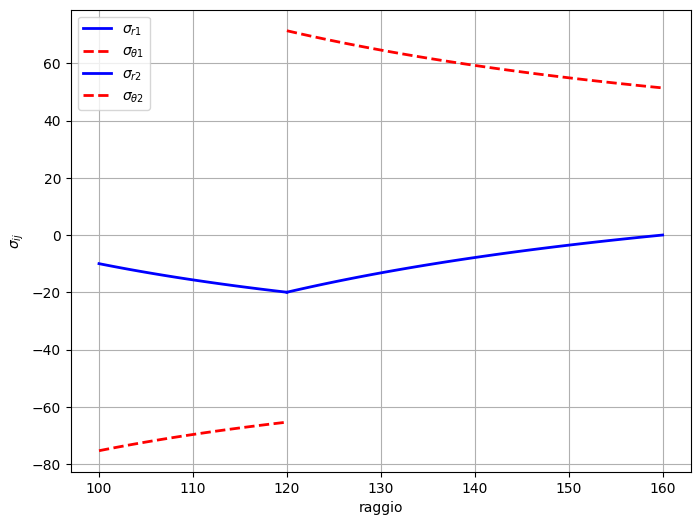

In [24]:
#   le ipotesi per questo foglio di calcolo sono:
#
#   * materiale omogeneo
#
#       * se i materiali hanno differenti moduli elastici non si possono 
#         portare avanti le semplificazioni nella trattazione analitica
#         che arrivano a riciclare le informazioni scalari per entrambe 
#         le parametrizzazioni delle sigma.
#
#   * legame costitutivo lineare elastico
#
#       * idem come sopra
# -----------------------------------------------------------------

import numpy as np
import matplotlib.pyplot as plt

# Funzione per pressione interna --> condizione di carico =! da dominio fisico
def pressione_interna (r, r_i, r_e, p_i):

    sigma_radiale = p_i * (r_i**2 / (r_e**2 - r_i**2)) * (1 - (r_e / r)**2)
    sigma_anulare = p_i * (r_i**2 / (r_e**2 - r_i**2)) * (1 + (r_e / r)**2)

    return sigma_radiale , sigma_anulare

# Funzione per pressione esterna --> condizione di carico =! da dominio fisico

def pressione_esterna (r, r_i, r_e, p_e):

    sigma_radiale = -p_e * (r_e**2 / (r_e**2 - r_i**2)) * (1 - (r_i / r)**2)
    sigma_anulare = -p_e * (r_e**2 / (r_e**2 - r_i**2)) * (1 + (r_i / r)**2)

    return sigma_radiale , sigma_anulare

def grafico_tensioni (r,y1,y2):

    # Create the plot
    plt.figure(figsize=(8, 6))

    # Plot the first expression
    plt.plot(r, y1, label=r'$\sigma_{r} = p_i \cdot \frac{r_i^{2}}{r_e^{2}-r_i^{2}} \cdot \{ 1- ( \frac{r_e}{r})^{2} \}$', color='b', linestyle='-', linewidth=2)

    # Plot the second expression
    plt.plot(r, y2, label=r'$\sigma_{\theta} = p_i \cdot \frac{r_i^{2}}{r_e^{2}-r_i^{2}} \cdot \{ 1+ ( \frac{r_e}{r})^{2} \}$', color='r', linestyle='--', linewidth=2)

    # Label the axes
    plt.xlabel('raggio')
    plt.ylabel('$\sigma_{ij}$')

    # Add grid and legend
    plt.grid(True)
    plt.legend()

    # Show the plot
    plt.show()
    return

#----------------- main script ------------------------------------------------------


# Input values for r_i, r_e, p_i, p_e
r_i = float(input("Enter the value of r_i: "))
r_e = float(input("Enter the value of r_e: "))
r_0 = float(input("Enter the value of r_0: "))
p_i = float(input("Enter the value of p_i: "))
p_e = float(input("Enter the value of p_e: "))
p_c = float(input("Enter the value of p_c: "))

# r_i = 100; r_e = 150; r_0 = 120; p_i = 10; p_c = 30 ; p_e = 0

# Define the range for the free variable 'r'


match (p_i,p_e,p_c):

    case (0,_,0):
        y1, y2 = pressione_esterna(r, r_i, r_e, p_e)
        bc_pressione = p_e
        r = np.linspace(r_i, r_e, 100)  # r varies between r_i and r_e
        grafico_tensioni(r,y1,y2)
        

    case(_,0,0):
        y1, y2 = pressione_interna(r, r_i, r_e, p_i)
        bc_pressione = p_i
        r_int = np.linspace(r_i, r_e, 100)  # r varies between r_i and r_e
        grafico_tensioni(r,y1,y2)

    case(_,0,_): # occorre sovrapporre gli effetti

        r1 = np.linspace(r_i, r_0, 50)

        A = p_i * (r_i**2 / (r_e**2 - r_i**2))
        B = - p_c * (r_0**2 / (r_0**2 - r_i**2)) 

        A_segn = p_i * (r_i**2 / (r_e**2 - r_i**2)) - p_c * (r_0**2 / (r_0**2 - r_i**2)) 
        B_segn = (A+B*(r_i/r_e)**2)

        y1 = A_segn - B_segn * (r_e/r1)**2
        y2 = A_segn + B_segn * (r_e/r1)**2

        r2 = np.linspace(r_0, r_e, 50)

        A_segn = A +  p_c * (r_0**2 / (r_e**2 - r_0**2))

        y3 = A_segn * (1 - (r_e/r2)**2)
        y4 = A_segn * (1 + (r_e/r2)**2)

        r_combined = np.concatenate((r1, r2))

        # -------------------- grafico -------------------
        
        plt.figure(figsize=(8, 6))

        # Plot y1 and y2 (over the first range)

        plt.plot(r_combined[:len(y1)], y1, label=r'$\sigma_{r1}$', color='b', linestyle='-', linewidth=2)
        plt.plot(r_combined[:len(y2)], y2, label=r'$\sigma_{\theta 1}$', color='r', linestyle='--', linewidth=2)

        # Plot y3 and y4 (over the second range)
        plt.plot(r_combined[len(y1):], y3, label=r'$\sigma_{r2}$', color='b', linestyle='-', linewidth=2)
        plt.plot(r_combined[len(y2):], y4, label=r'$\sigma_{\theta 2}$', color='r', linestyle='--', linewidth=2)

        # Label the axes
        plt.xlabel('raggio')
        plt.ylabel('$\sigma_{ij}$')

        # Add grid and legend
        plt.grid(True)
        plt.legend()

        # Show the plot
        plt.show()
       

    case _:
        print("no case matched")